In [2]:
#载入训练数据
import numpy as np
import pandas as pd
train_data = pd.read_csv('../dataset/processed_dataset/train/processed_bop_train.csv',index_col=0, header=0)
test_data = pd.read_csv('../dataset/processed_dataset/test/processed_bop_test.csv',index_col=0, header=0)
train_data['log_budget'] = np.log1p(train_data['budget'])
test_data ['log_budget'] = np.log1p(test_data ['budget'])
train_data['log_revenue'] = np.log1p(train_data['revenue'])
test_data ['log_revenue'] = np.log1p(test_data ['revenue'])

In [3]:
#划分标签和特征
X_train = train_data.drop(['budget','revenue','log_revenue'],axis=1)  # 特征
y_train= train_data['log_revenue']  # 标签
X_test = test_data.drop(['budget','revenue','log_revenue'], axis=1)  # 特征
y_test = test_data['revenue']  # 标签

Fitting 5 folds for each of 96 candidates, totalling 480 fits
Random Forest RMSLE with Best Parameters:  1.8385338661552078


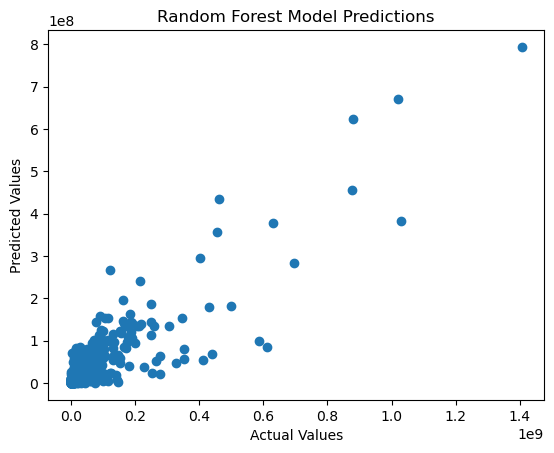

In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_log_error
import matplotlib.pyplot as plt
import numpy as np

# Set parameter grid for GridSearchCV
param_grid = {'n_estimators': [100, 200, 300],
              'max_features': ['auto', 'sqrt'],
              'max_depth': [10, 20],
              'min_samples_split': [2, 5],
              'min_samples_leaf': [1, 2],
              'bootstrap': [True, False]}
# Create RandomForestRegressor model
rf = RandomForestRegressor(random_state=42)

# Set up GridSearchCV with 5-fold cross validation
rf_grid = GridSearchCV(estimator=rf, param_grid=param_grid, 
                       cv=5, verbose=2, n_jobs=-1)

# Fit model with GridSearchCV
rf_grid.fit(X_train, y_train)

# Get best parameters from GridSearchCV
best_params = rf_grid.best_params_

# Create new RandomForestRegressor model with best parameters
rf_best = RandomForestRegressor(**best_params, random_state=42)

# Fit model with best parameters
rf_best.fit(X_train, y_train)

# Get predictions from model with best parameters
rf_preds = np.expm1(rf_best.predict(X_test))

# Calculate RMSLE for model with best parameters
rf_rmsle = np.sqrt(mean_squared_log_error(y_test, rf_preds))

# Print RMSLE for model with best parameters
print("Random Forest RMSLE with Best Parameters: ", rf_rmsle)
# Create scatter plot of actual vs predicted values
plt.scatter(y_test, rf_preds)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Model Predictions')
plt.savefig('random_forest_predictions.png')
plt.show()

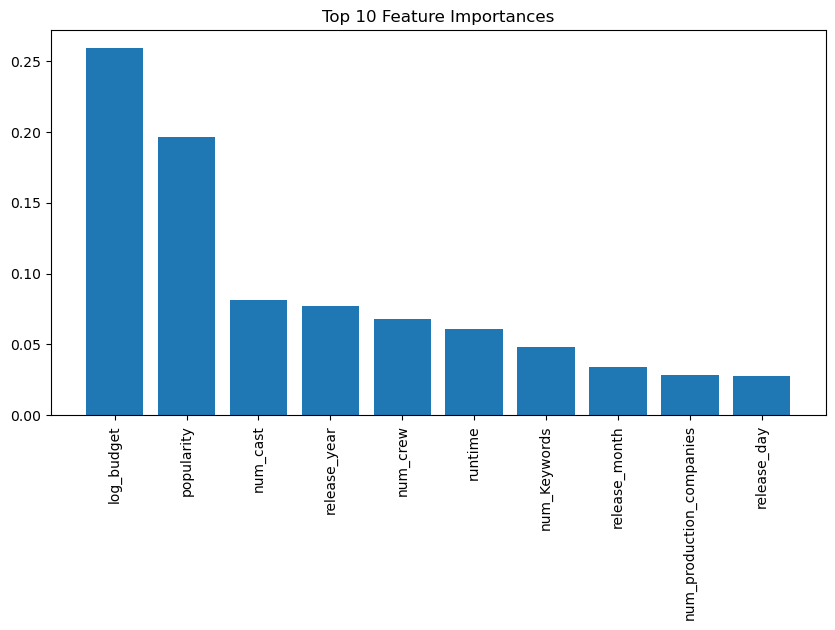

In [6]:
# Get feature importances from model with best parameters
importances = rf_best.feature_importances_

# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]

# Get top 10 feature names and importances
top_features = X_train.columns[indices][:10]
top_importances = importances[indices][:10]

# Plot top 10 feature importances
plt.figure(figsize=(10,5))
plt.title('Top 10 Feature Importances')
plt.bar(top_features, top_importances)
plt.xticks(rotation=90)
plt.savefig('Top 10 Feature Importances.png',bbox_inches='tight')
plt.show()